In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei", "Heiti SC", "Heiti TC"]
plt.rcParams["axes.unicode_minus"] = False

# 创建输出目录（确保图表可保存）
os.makedirs("figures", exist_ok=True)

# 加载数据
train_df = pd.read_csv("../data/original/train.csv")
test_df = pd.read_csv("../data/original/test.csv")

# 1. 基本信息查看
print("=== 训练集基本信息 ===")
print(f"形状: {train_df.shape}")
print(f"字段: {train_df.columns.tolist()}")
display(train_df.head())

print("\n=== 测试集基本信息 ===")
print(f"形状: {test_df.shape}")
print(f"字段: {test_df.columns.tolist()}")
display(test_df.head())

# 2. 数据类型与缺失值检查
print("\n=== 训练集数据类型与缺失值 ===")
display(train_df.info())
print("\n=== 测试集数据类型与缺失值 ===")
display(test_df.info())

=== 训练集基本信息 ===
形状: (10886, 12)
字段: ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1



=== 测试集基本信息 ===
形状: (6493, 9)
字段: ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014



=== 训练集数据类型与缺失值 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None


=== 测试集数据类型与缺失值 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


None

In [9]:
# 生成统计摘要
train_stats = train_df.describe()
test_stats = test_df.describe()

# 保存统计摘要
train_stats.to_csv("../data/analysis/train_statistics.csv")
test_stats.to_csv("../data/analysis/test_statistics.csv")

# 显示关键统计量
print("=== 训练集统计摘要 ===")
display(train_stats)
print("\n=== 测试集统计摘要 ===")
display(test_stats)

# 分析目标变量分布特征
print("\n=== 目标变量(count)关键指标 ===")
print(f"均值: {train_df['count'].mean():.2f}")
print(f"中位数: {train_df['count'].median()}")
print(f"最大值: {train_df['count'].max()}")
print(f"最小值: {train_df['count'].min()}")
print(f"标准差: {train_df['count'].std():.2f}")

=== 训练集统计摘要 ===


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000



=== 测试集统计摘要 ===


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600



=== 目标变量(count)关键指标 ===
均值: 191.57
中位数: 145.0
最大值: 977
最小值: 1
标准差: 181.14


In [10]:
### 步骤5：数据类型转换 + 时间特征提取 ###

# 1. 转换datetime字段为时间格式
train_df["datetime"] = pd.to_datetime(train_df["datetime"])
test_df["datetime"] = pd.to_datetime(test_df["datetime"])

# 2. 从datetime中提取所有时间特征（按要求补充）
def extract_all_time_features(df):
    df_new = df.copy()
    # 基础时间特征
    df_new["hour"] = df_new["datetime"].dt.hour  # 小时（0-23）
    df_new["weekday"] = df_new["datetime"].dt.weekday  # 星期几（0=周一，6=周日）
    df_new["month"] = df_new["datetime"].dt.month  # 月份（1-12，辅助年度周期分析）

    # 衍生时间特征
    df_new["is_weekend"] = df_new["weekday"].isin([5, 6]).astype(int)  # 是否周末（1=是）
    df_new["is_rush_hour"] = (df_new["hour"].between(7, 9) | df_new["hour"].between(17, 19)).astype(int)  # 是否高峰时段

    # 季节字段补充（数据集已有season，添加名称便于分析）
    df_new["season_name"] = df_new["season"].map({1: "春季", 2: "夏季", 3: "秋季", 4: "冬季"})
    return df_new

# 应用到训练集和测试集
train_df = extract_all_time_features(train_df)
test_df = extract_all_time_features(test_df)

# 3. 验证结果
print("=== 数据类型验证 ===")
print(f"训练集datetime类型: {train_df['datetime'].dtype}")  # 应显示datetime64[ns]
print(f"测试集datetime类型: {test_df['datetime'].dtype}")

print("\n=== 新增时间特征样例 ===")
# 展示关键时间特征（前5行）
display(train_df[["datetime", "hour", "weekday", "is_weekend", "is_rush_hour", "season", "season_name"]].head())

=== 数据类型验证 ===
训练集datetime类型: datetime64[ns]
测试集datetime类型: datetime64[ns]

=== 新增时间特征样例 ===


,datetime,hour,weekday,is_weekend,is_rush_hour,season,season_name
0,2011-01-01 00:00:00,0,5,1,0,1,春季
1,2011-01-01 01:00:00,1,5,1,0,1,春季
2,2011-01-01 02:00:00,2,5,1,0,1,春季
3,2011-01-01 03:00:00,3,5,1,0,1,春季
4,2011-01-01 04:00:00,4,5,1,0,1,春季


训练集风速为0的比例: 12.06%
测试集风速为0的比例: 13.35%


findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC'

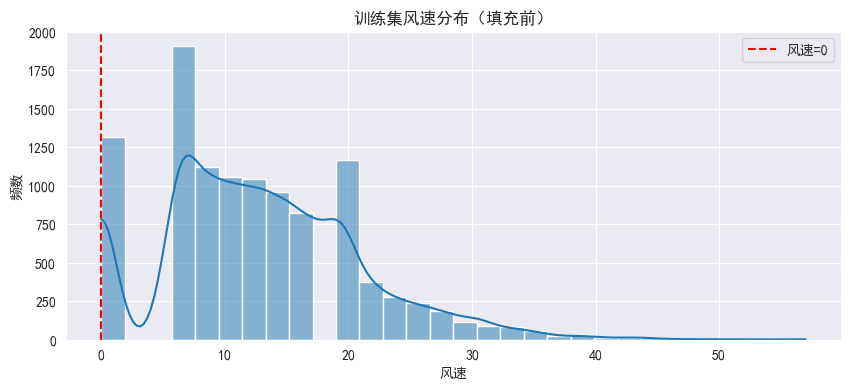

findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.



填充后训练集风速为0的比例: 0.00%


findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC'

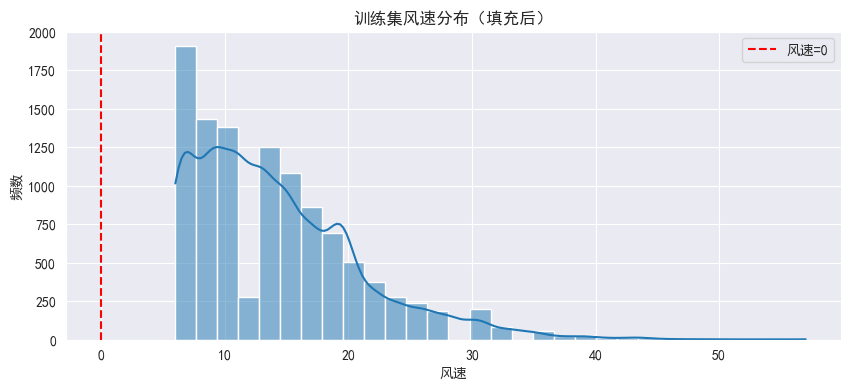

In [11]:
# 1. 分析风速0值问题
train_zero_wind_ratio = (train_df["windspeed"] == 0).mean() * 100
test_zero_wind_ratio = (test_df["windspeed"] == 0).mean() * 100

print(f"训练集风速为0的比例: {train_zero_wind_ratio:.2f}%")
print(f"测试集风速为0的比例: {test_zero_wind_ratio:.2f}%")

# 可视化风速分布
plt.figure(figsize=(10, 4))
sns.histplot(train_df["windspeed"], bins=30, kde=True)
plt.axvline(x=0, color="red", linestyle="--", label="风速=0")
plt.title("训练集风速分布（填充前）")
plt.xlabel("风速")
plt.ylabel("频数")
plt.legend()
plt.savefig("figures/windspeed_distribution_before.png")
plt.show()

# 2. 风速0值填充函数
def fill_windspeed(df):
    """使用相同季节、天气、小时的风速均值填充0值"""
    df_filled = df.copy()
    # 按季节、天气、小时分组计算均值
    wind_groups = df_filled.groupby(["season", "weather", "hour"])["windspeed"].mean()

    # 填充0值
    zero_mask = df_filled["windspeed"] == 0
    for idx in df_filled[zero_mask].index:
        s = df_filled.loc[idx, "season"]
        w = df_filled.loc[idx, "weather"]
        h = df_filled.loc[idx, "hour"]
        # 若分组无数据则用全局均值
        df_filled.loc[idx, "windspeed"] = wind_groups.get((s, w, h), df_filled["windspeed"].mean())
    return df_filled

# 3. 执行填充
train_filled = fill_windspeed(train_df)
test_filled = fill_windspeed(test_df)

# 4. 验证填充结果
print(f"\n填充后训练集风速为0的比例: {(train_filled['windspeed'] == 0).mean()*100:.2f}%")

# 可视化填充后分布
plt.figure(figsize=(10, 4))
sns.histplot(train_filled["windspeed"], bins=30, kde=True)
plt.axvline(x=0, color="red", linestyle="--", label="风速=0")
plt.title("训练集风速分布（填充后）")
plt.xlabel("风速")
plt.ylabel("频数")
plt.legend()
plt.savefig("figures/windspeed_distribution_after.png")
plt.show()

findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC'

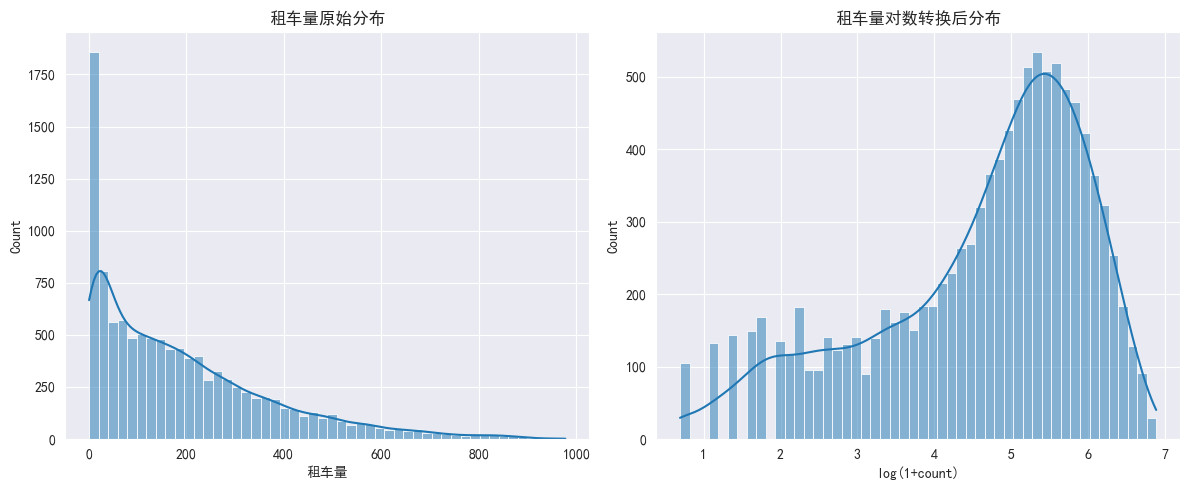

findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC'

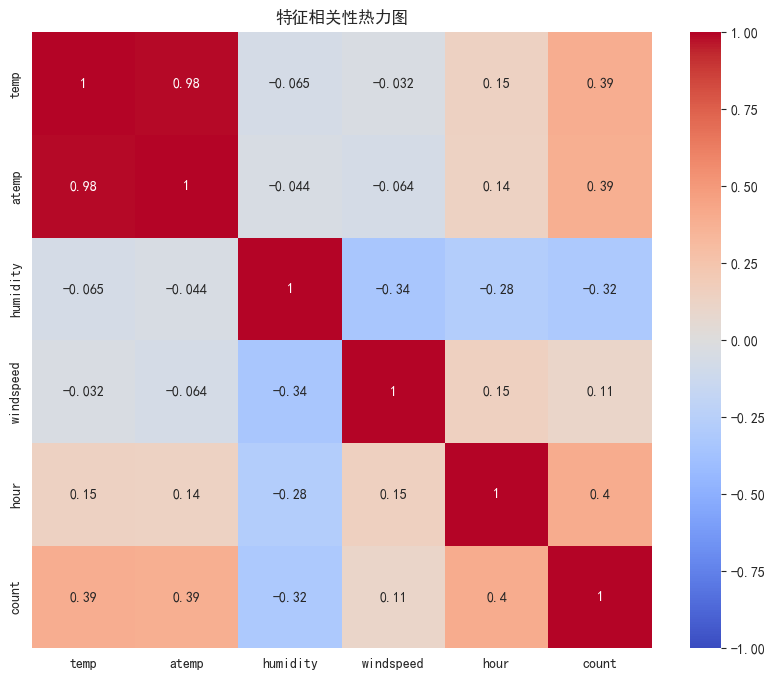

findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC'

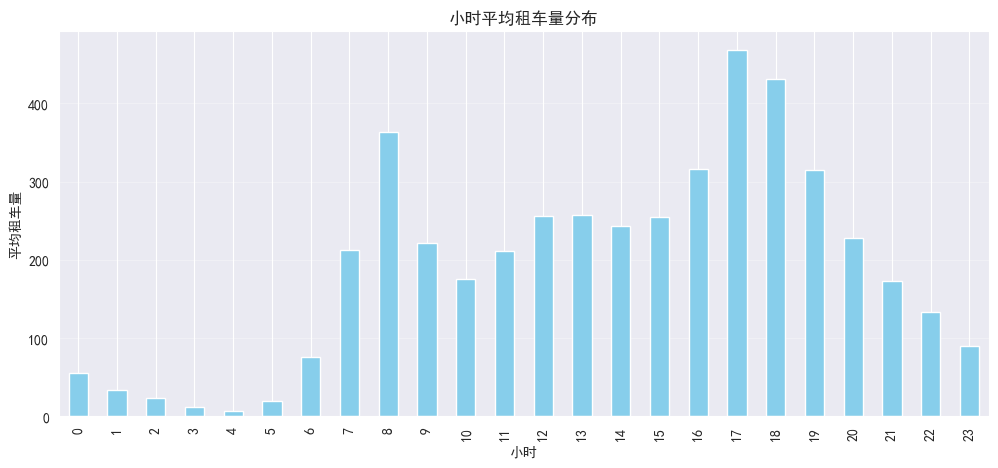

findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC' not found.
findfont: Font family 'Heiti SC'

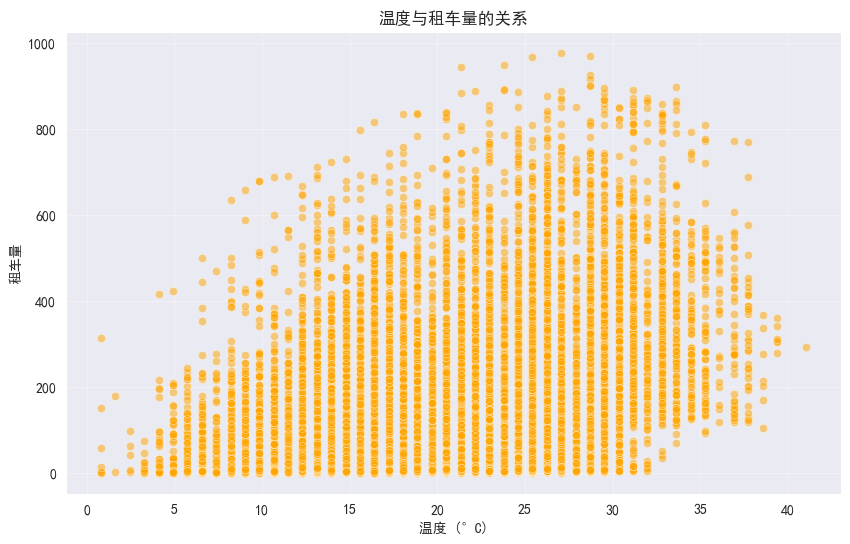

In [12]:
# 1. 目标变量count分布
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_filled["count"], bins=50, kde=True)
plt.title("租车量原始分布")
plt.xlabel("租车量")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(train_filled["count"]), bins=50, kde=True)  # 适配RMSLE
plt.title("租车量对数转换后分布")
plt.xlabel("log(1+count)")

plt.tight_layout()
plt.savefig("figures/count_distribution.png")
plt.show()

# 2. 特征相关性热力图
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'hour', 'count']
corr_matrix = train_filled[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("特征相关性热力图")
plt.savefig("figures/correlation_heatmap.png")
plt.show()

# 3. 小时与租车量关系
hourly_avg = train_filled.groupby("hour")["count"].mean()
plt.figure(figsize=(12, 5))
hourly_avg.plot(kind="bar", color="skyblue")
plt.title("小时平均租车量分布")
plt.xlabel("小时")
plt.ylabel("平均租车量")
plt.grid(axis="y", alpha=0.3)
plt.savefig("figures/hourly_count.png")
plt.show()

# 4. 温度与租车量关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x="temp", y="count", data=train_filled, alpha=0.5, color="orange")
plt.title("温度与租车量的关系")
plt.xlabel("温度 (°C)")
plt.ylabel("租车量")
plt.grid(alpha=0.3)
plt.savefig("figures/temp_vs_count.png")
plt.show()

In [13]:
# 保存清洗后的数据集（保留所有字段，包括新增的hour）
train_filled.to_csv("../data/processed/train_cleaned.csv", index=False)
test_filled.to_csv("../data/processed/test_cleaned.csv", index=False)

# 验证保存结果
print("\n清洗后训练集形状:", pd.read_csv("../data/processed/train_cleaned.csv").shape)
print("清洗后测试集形状:", pd.read_csv("../data/processed/test_cleaned.csv").shape)


清洗后训练集形状: (10886, 18)
清洗后测试集形状: (6493, 15)
